In [1]:
# default_exp optim_w_augment_3
%load_ext autoreload
%autoreload 2

# Analysing OCR Models: ABORTED

> Comparing the OCR models used to human experimental data and each other.

In [26]:
#export
from aifont.core import *
from aifont.fontlearner import *
from aifont.fontsampler import *
from aifont.ocrlearner import *
from collections import OrderedDict
from enum import Enum, auto
from fastai.data.all import *
from fastai.vision.all import *
import gc
from nbdev.showdoc import *
from pandas import DataFrame
from PIL.ImageOps import invert
import pydiffvg
import torch
from typing import Callable, List, Protocol, Tuple, Union

## Utilities

In [ ]:
DUMP_FOLDER = Path("results/test_nb13_ocr_models")

## Other Utilities

## 1. Experiment 3: Analysis

Create the augmentation before loss to randomly offset the letters a bit.

In [30]:
cornet_files = [
    "cornet_for_ocr__get_combined_az_and_tmnist_df_aug_sz48_iter1",
    "cornet_for_ocr__get_combined_az_and_tmnist_df_aug_sz48_iter2",
    "cornet_for_ocr__get_combined_az_and_tmnist_df_aug_sz48_iter3",
    "cornet_for_ocr__get_combined_az_and_tmnist_df_aug_sz48_iter4",
    "cornet_for_ocr__get_combined_az_and_tmnist_df_aug_sz48_iter5",
    "cornet_for_ocr__get_combined_az_and_tmnist_df_aug_sz48_fullds"
]

ocr_fn = cornet_files[0]
learner = get_learner(ocr_fn)
learner.show_batch()
img = learner.render_letter("A", apply_tfms=True)
# # img.crop_pad(size, tl=(-5, -5), pad_mode=PadMode.Reflection)
# image_grid([learner.render_letter("A", apply_tfms=True) for _ in range(10)], scale=5.)

/Users/kallejarvenpaa/Desktop/AI-fontti/aifont/aifont/fontlearner.py:2629: UserWarning: Using default input_shape: (28, 28)
  warn(f"Using default input_shape: {input_shape}")


In [ ]:
args = dict(arch=cornet_for_ocr, 
            df=get_combined_az_and_tmnist_df)
model_fns = [get_learner_filename(**args, version=f"aug_iter{i}") for i in range(1,6)]
model_fns += [get_learner_filename(**args, version=f"aug")]
learn = None; gc.collect()
learn = get_ocr_learner_3(**args,
                            use_xtra_tfms=True, 
                            size=48, 
                            normalize=True,
                            load_saved=False,
                            bs=256)

/var/folders/3p/10hbv0415234v3x5ctp50l4m0000gn/T/ipykernel_3270/433064654.py:57: UserWarning: Undersampled to max 2240 items / category, using 56043 items of 372450.
  warn(f"Undersampled to max {n_min} items / category, using {len(df)} items of {tot}.")
/Users/kallejarvenpaa/opt/miniconda3/envs/ai-font-p3.9/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1634272478997/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [ ]:
def plot_confusion_matrix(vocab, cm, 
    normalize=False, 
    title='Confusion matrix', 
    cmap="Blues", 
    norm_dec=2,
    plot_txt=True, 
    **kwargs):
    "Plot the confusion matrix, with `title` and using `cmap`."
    # This function is mainly copied from the sklearn docs
    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig = plt.figure(**kwargs)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(vocab))
    plt.xticks(tick_marks, vocab, rotation=90)
    plt.yticks(tick_marks, vocab, rotation=0)

    if plot_txt:
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            coeff = f'{cm[i, j]:.{norm_dec}f}' if normalize else f'{cm[i, j]}'
            plt.text(j, i, coeff, horizontalalignment="center", verticalalignment="center", color="white" if cm[i, j] > thresh else "black")

    ax = fig.gca()
    ax.set_ylim(len(vocab)-.5,-.5)

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.grid(False)

In [ ]:
cms = {}
for fn in model_fns:
    learn.load(fn)
    interp = ClassificationInterpretation.from_learner(learn)
    cms[fn] = interp.confusion_matrix()

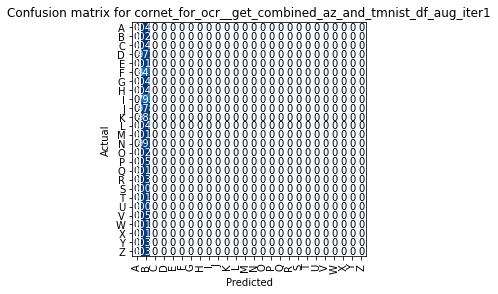

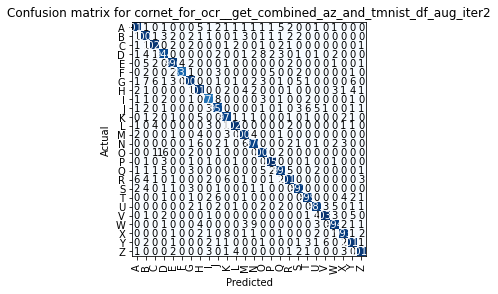

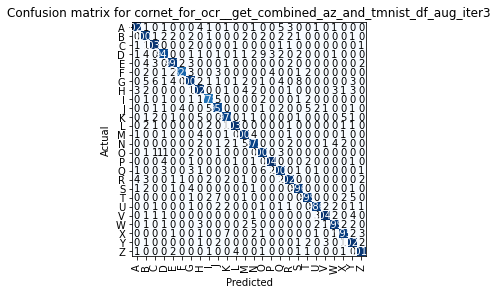

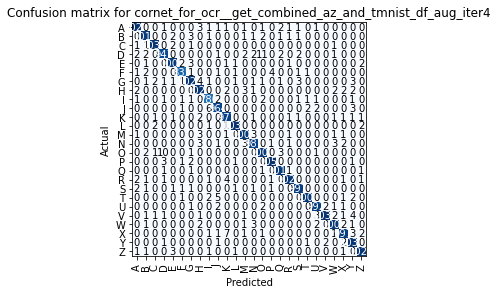

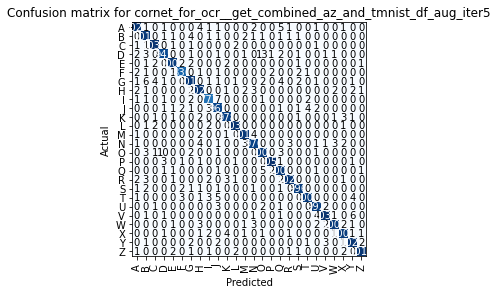

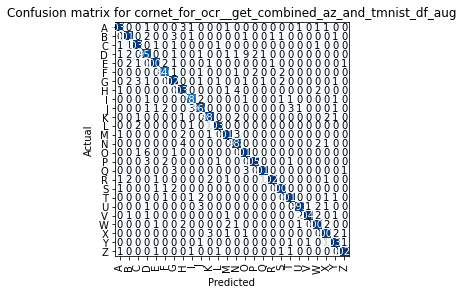

In [ ]:
vocab = learn.dls.vocab[1]
for fn,cm in cms.items():
    plot_confusion_matrix(vocab, cm, title=f"Confusion matrix for {fn}")
dump(cms, DUMP_FOLDER/"ocr_confusion_matrices")

## Export

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_fontsampler.ipynb.
Converted 02_ocrlearner.ipynb.
Converted 03_fontlearner.ipynb.
Converted index.ipynb.
